In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

plotly = False

In [2]:
data = pd.read_csv('APPL.csv',parse_dates=True, index_col=0)
series = data.Close
series.tail()

Date
2018-03-04    176.21
2018-03-11    179.98
2018-03-18    178.02
2018-03-25    164.94
2018-04-01    168.34
Name: Close, dtype: float64

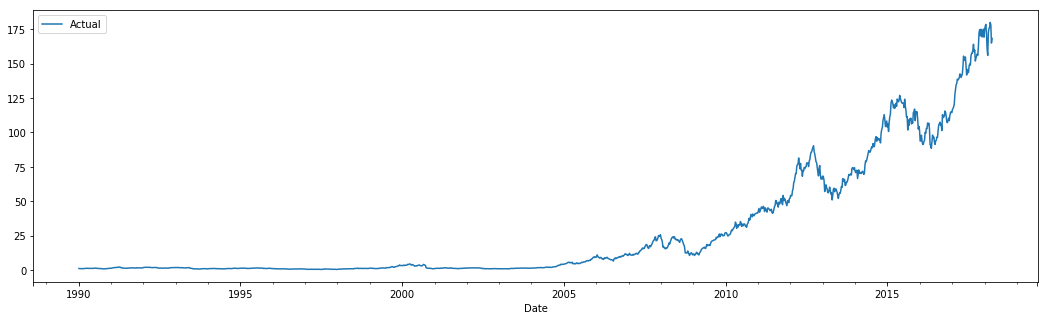

In [3]:
plt.figure(figsize=(18,5))
series.plot(label="Actual",legend=True)

In [4]:
import math
last = data.shape[0]-math.ceil(.3*(data.shape[0]))

### Moving Average

In [5]:
ma10 = series.rolling(window=10).mean()
ma10.tail()

Date
2018-03-04    171.1825
2018-03-11    172.2575
2018-03-18    172.5595
2018-03-25    171.3445
2018-04-01    170.3325
Name: Close, dtype: float64

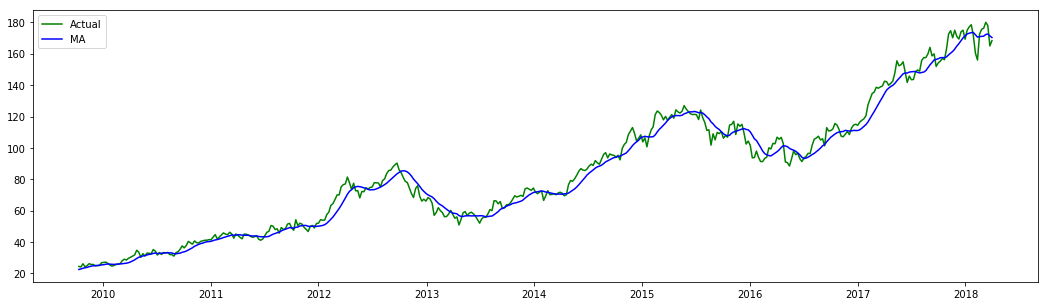

In [6]:
if plotly:
    original = go.Scatter( x = series[last:].index, y = series[last:], name = "Actual", line=dict( color='green'))
    predicted = go.Scatter( x = ma10[last:].index, y = ma10[last:], name = "MA", line=dict( color='blue'))
    plots = [original,predicted]
    py.iplot(plots, filename='our predictions')
else:
    plt.figure(figsize=(18,5))
    original = series[last:]
    predicted = ma10[last:]
    plt.plot(original.index,original,'g',label="Actual",)
    plt.plot(predicted.index,predicted,'b',label="MA")
    plt.legend()

### Upper and lower bounds

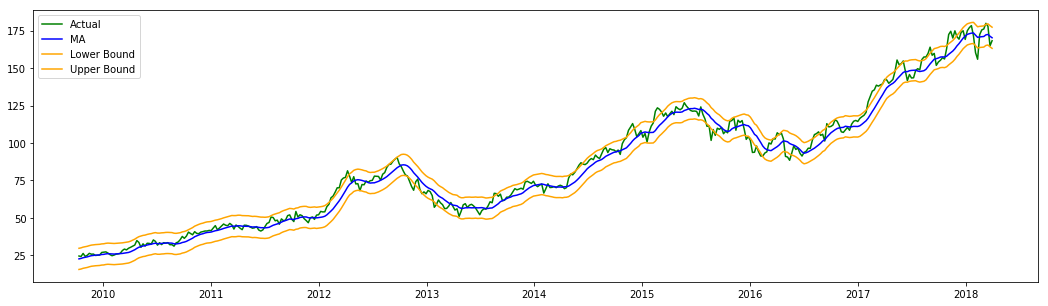

In [7]:
scale = 1.96
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(series[10:],ma10[10:])
deviation = np.std(series[10:]-ma10[10:])
lowerb = ma10[last:] - (mae + scale * deviation )
upperb = ma10[last:] + (mae + scale * deviation )
if plotly:
    lower_bounds = go.Scatter( x = lowerb.index, y = lowerb, name="Lower Bound", 
                          mode="lines", line = dict( color = 'orange', dash='dash' ))
    upper_bounds = go.Scatter( x = upperb.index, y = upperb, name="Upper Bound",
                          mode="lines", line = dict( color = 'orange', dash='dash' ) )
    plots = [original,predicted,lower_bounds, upper_bounds]
    py.iplot(plots, filename='our predictions')
else:
    plt.figure(figsize=(18,5))
    plt.plot(original.index,original,'g',label="Actual",)
    plt.plot(predicted.index,predicted,'b',label="MA")
    plt.plot(lowerb.index,lowerb,'#FFA500',label="Lower Bound")
    plt.plot(upperb.index,upperb,'#FFA500',label="Upper Bound")
    plt.legend()

### Anomalies
Actual crossing lower or upper bounds

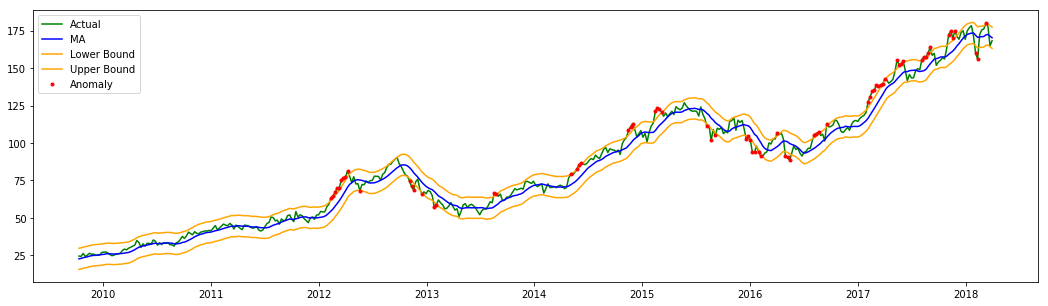

In [8]:
anomalies = pd.Series(index=series[last:].index, name=series.name)
anomalies.loc[ series[last:].index[series[last:] < lowerb ] ] = series[last:][series[last:] < lowerb].values
anomalies.loc[ series[last:].index[series[last:] > upperb ] ] = series[last:][series[last:] > upperb].values
if plotly:
    anomalies_plot = go.Scatter( x = anomalies.index, y = anomalies, name="Anomaly",
                              mode="markers", marker = dict( color = 'red',size=5) )
    plots = [original,predicted,lower_bounds, upper_bounds,anomalies_plot]
    py.iplot(plots, filename='our predictions')
else:
    plt.figure(figsize=(18,5))
    plt.plot(original.index,original,'g',label="Actual",)
    plt.plot(predicted.index,predicted,'b',label="MA")
    plt.plot(lowerb.index,lowerb,'#FFA500',label="Lower Bound")
    plt.plot(upperb.index,upperb,'#FFA500',label="Upper Bound")
    plt.plot(anomalies.index,anomalies,'ro',markersize=3,label="Anomaly")
    plt.legend()

In [9]:
from sklearn.metrics import mean_absolute_error,r2_score
print("Mean Absolute Error :{}".format(mean_absolute_error(ma10[last:],series[last:])))
print("R Square : {}".format(r2_score(ma10[last:],series[last:])))

Mean Absolute Error :3.8823900491533565
R Square : 0.9830993457927725
